In [15]:
import pandas as pd
import os
%run 'functions_dump.py'
%matplotlib inline

/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/karen/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [8]:
%run 'ks39_Read_conservation_score.ipynb'


Variables: 

- positions:			a pandas.DataFrame with information about position numbers, segments etc
- get_segment_of_a_genotype:	a function that return the segment of genotype (the most likely segment
				because sometimes it's not possible to say for sure)


Variables: 

- conservation_scores:		a pandas.DataFrame with information from alignment about entropy, gap fraction 
				and conservation score of every position


In [2]:
%run 'ks23_Read_Lucas_sign_epistasis_data.ipynb'

94 positions under sign epistasis
59 positions under reciprocal sign epistasis
Pandas DataFrames available:
lucas_sign_epistasis, lucas_reciprocal_sign_epistasis

pBon threshold = 0.01
The following sets of positions are available:
all_sampled_positions, sign_epistasis_positions, reciprocal_sign_epistasis_positions


In [104]:
lucas_sign_epistasis['pos1_score'] = lucas_sign_epistasis['VarPos_absolute'].apply(lambda p: conservation_scores.loc[p]['entropy'])
lucas_sign_epistasis['pos2_score'] = lucas_sign_epistasis['SubPos_absolute'].apply(lambda p: conservation_scores.loc[p]['entropy'])
lucas_sign_epistasis['sum_score'] = lucas_sign_epistasis['pos1_score'] + lucas_sign_epistasis['pos2_score']
lucas_sign_epistasis['max_score'] = lucas_sign_epistasis[['pos1_score', 'pos2_score']].apply(lambda df: max(df), axis=1)
lucas_sign_epistasis['position_pair'] = lucas_sign_epistasis.apply(lambda df: tuple(sorted(df[['VarPos_absolute', 'SubPos_absolute']])), axis=1)

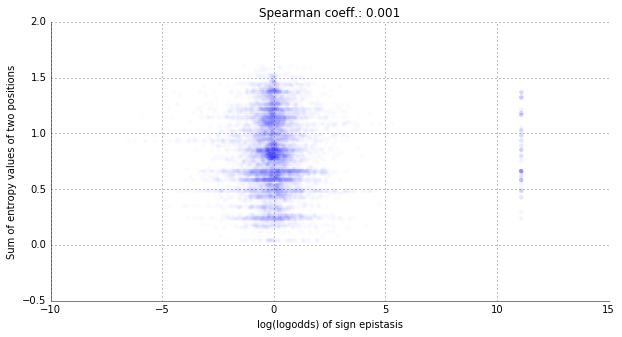

In [105]:
to_plot = lucas_sign_epistasis[['logodds', 'sum_score']].dropna()

plot_better()
plt.scatter(to_plot.logodds.apply(np.log), to_plot.sum_score, edgecolor='none', alpha=0.01)
plt.xlabel('log(logodds) of sign epistasis')
plt.ylabel('Sum of entropy values of two positions')
plt.title('Spearman coeff.: %.3f' %stats.spearmanr(to_plot.logodds, to_plot.sum_score)[0])

(0, 1.8)

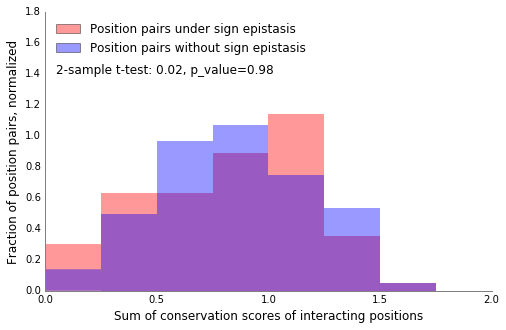

In [110]:
what = 'sum_score'
to_plot = lucas_sign_epistasis[['pBon', 'logodds', 'position_pair', what]].dropna()
sign = to_plot[(to_plot.pBon < 0.01) & (to_plot.logodds > 4)]
sign_set = set(sign.position_pair)

no_sign = to_plot[(to_plot.pBon > 0.05) & (~to_plot.position_pair.isin(sign_set))]
no_sign_set = set(no_sign.position_pair)


plot_better(width=8, height=5, grid='')
plt.hist(sign[what], edgecolor='none', alpha=0.4, normed=True, label='Position pairs under sign epistasis', range=(0,2), bins=8, color='red')
plt.hist(no_sign[what], edgecolor='none', alpha=0.4, normed=True, label='Position pairs without sign epistasis', range=(0,2), bins=8, color='blue')
plt.legend(loc='upper left', frameon=False)
plt.xlabel('Sum of conservation scores of interacting positions', fontsize=12)
plt.ylabel('Fraction of position pairs, normalized', fontsize=12)
# plt.ylabel('Max of conservation scores of two positions')
# plt.title('KS_2sample_test: %.3f, p_value=%.3f' %(stats.ks_2samp(sign.sum_score, no_sign.sum_score)))
# plt.title('Unpaired_2sample_ttest: %.3f, p_value=%.3f' %(stats.ttest_ind(sign.sum_score, no_sign.sum_score)))
plt.text(0.05, 1.4, '2-sample t-test: %.2f, p_value=%.2f' %(stats.ttest_ind(sign[what], no_sign[what])), fontsize=12)
plt.ylim(0,1.8)

In [205]:
lucas_sign_epistasis['pBon_good'] = lucas_sign_epistasis['pBon'].apply(lambda v: v < 0.01)
lucas_sign_epistasis['logodds_good'] = lucas_sign_epistasis['logodds'].apply(lambda v: v > 1)
lucas_sign_epistasis['all_good'] = lucas_sign_epistasis['pBon_good'] * lucas_sign_epistasis['logodds_good']
all_positions = set(lucas_sign_epistasis['VarPos_absolute'].values)
sign = set(lucas_sign_epistasis[lucas_sign_epistasis['all_good']]['VarPos_absolute'].values)
no_sign_positions = [p for p in all_positions if p not in sign]
conservation_sign = [conservation_scores.loc[p-1].gap_fr for p in sign]
conservation_no_sign = [conservation_scores.loc[p-1].gap_fr for p in no_sign_positions]

128


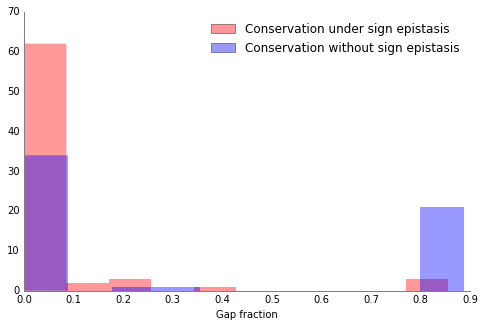

In [213]:
plot_better(width=8, height=5, grid='')
plt.hist(conservation_sign, edgecolor='none', alpha=0.4, label='Conservation under sign epistasis', color='red')
plt.hist(conservation_no_sign, edgecolor='none', alpha=0.4, label='Conservation without sign epistasis', color='blue')
plt.legend(loc='upper right', frameon=False)
# plt.xlabel('Sum of conservation scores of interacting positions', fontsize=12)
# plt.ylabel('Fraction of position pairs, normalized', fontsize=12)
# # plt.ylabel('Max of conservation scores of two positions')
# # plt.title('KS_2sample_test: %.3f, p_value=%.3f' %(stats.ks_2samp(sign.sum_score, no_sign.sum_score)))
# # plt.title('Unpaired_2sample_ttest: %.3f, p_value=%.3f' %(stats.ttest_ind(sign.sum_score, no_sign.sum_score)))
# plt.text(0.42, 9.4, '2-sample t-test: %.2f, p_value=%.2f' %(stats.ttest_ind(conservation_sign, conservation_no_sign)), fontsize=12)
# plt.ylim(0,1.8)
plt.xlabel('Gap fraction')
print len(conservation_no_sign) + len(conservation_sign)